<a href="https://colab.research.google.com/github/alpopfares25/Flight-Fare-Prediction/blob/main/Flight_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Dataset Link : https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?select=Clean_Dataset.csv

#Flight Fare Prediction
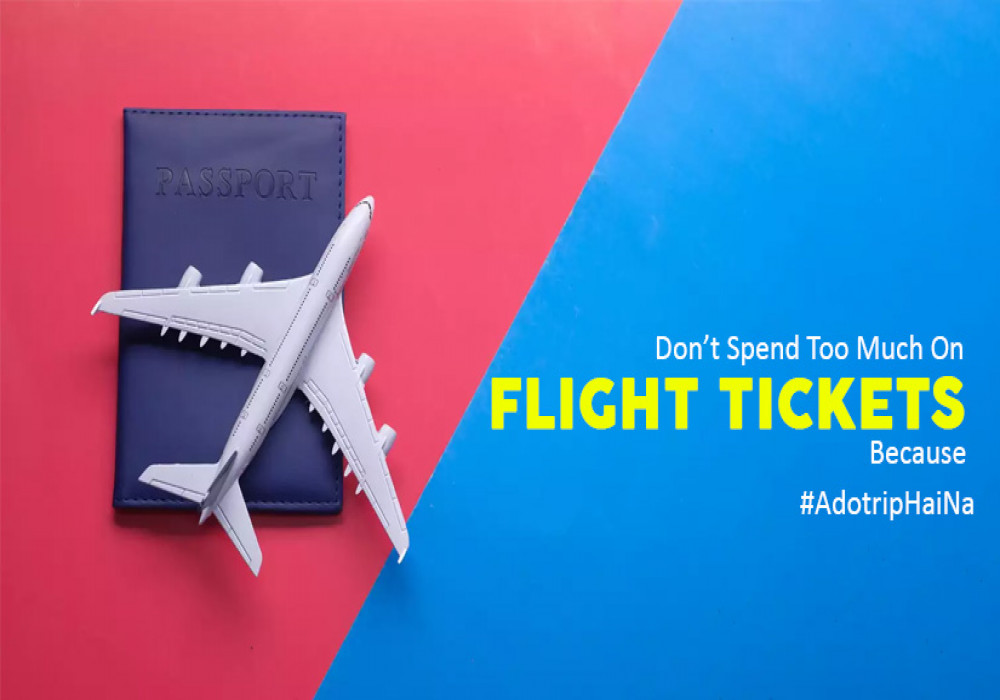

#Import Libraries

In [ ]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
#from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor





from pandas_profiling import ProfileReport

import seaborn as sns #for visualization

#Read data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/flight_price.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


#EDA & Visualisation

##The aim of our study is to answer the below research questions:


*   Does price vary with Airlines?

*   Does ticket price change based on the departure time and arrival time?

*   How the price changes with change in Source and Destination?
*   How does the ticket price vary between Economy and Business class?


*   How does duration affected ticket price based on class?


*   How does days left affected ticket price?





###Does price vary with Airlines?

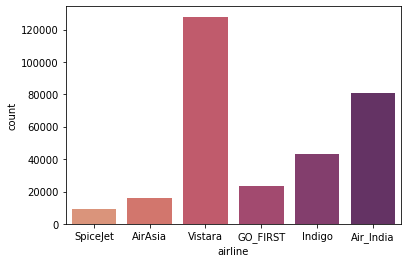

In [ ]:

sns.countplot(x="airline",data=df,palette='flare')

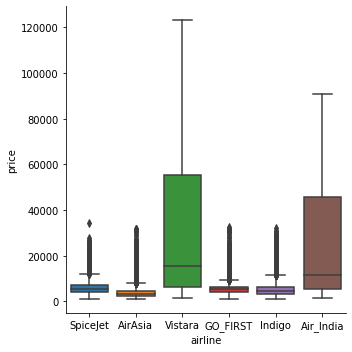

In [ ]:
sns.catplot(x = 'airline', y="price", kind="box", data = df)

###Does ticket price change based on the departure time and arrival time?

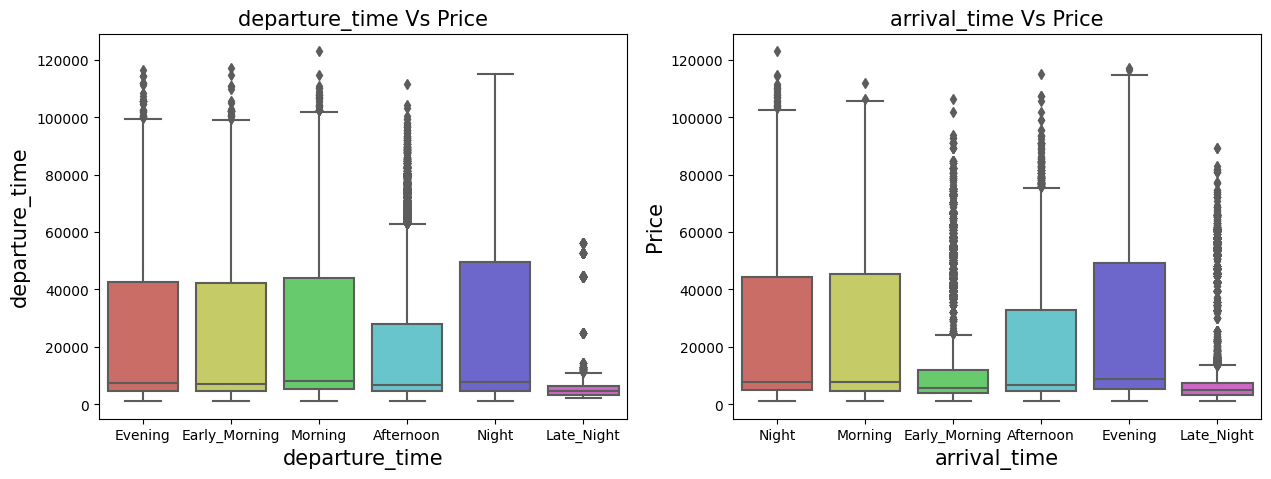

In [ ]:
plt.style.use('default')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['departure_time'],y=df['price'],palette='hls')
plt.title('departure_time Vs Price',fontsize=15)
plt.xlabel('departure_time',fontsize=15)
plt.ylabel('departure_time',fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(x=df['arrival_time'],y=df['price'],palette='hls')
plt.title('arrival_time Vs Price',fontsize=15)
plt.xlabel('arrival_time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

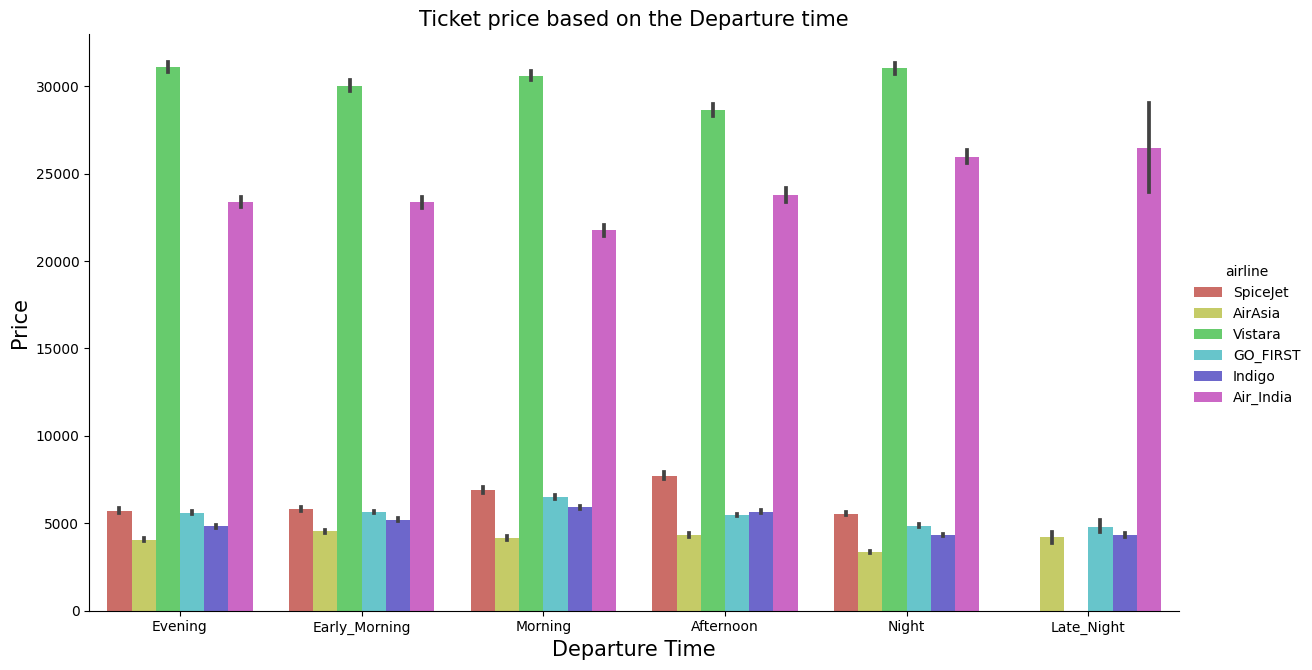

In [ ]:
plt.style.use('default')
sns.catplot(data=df, kind="bar", x="departure_time", y="price", hue="airline", height=6.5, aspect=12/6.5,palette='hls' )
plt.title('Ticket price based on the Departure time',fontsize=15)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

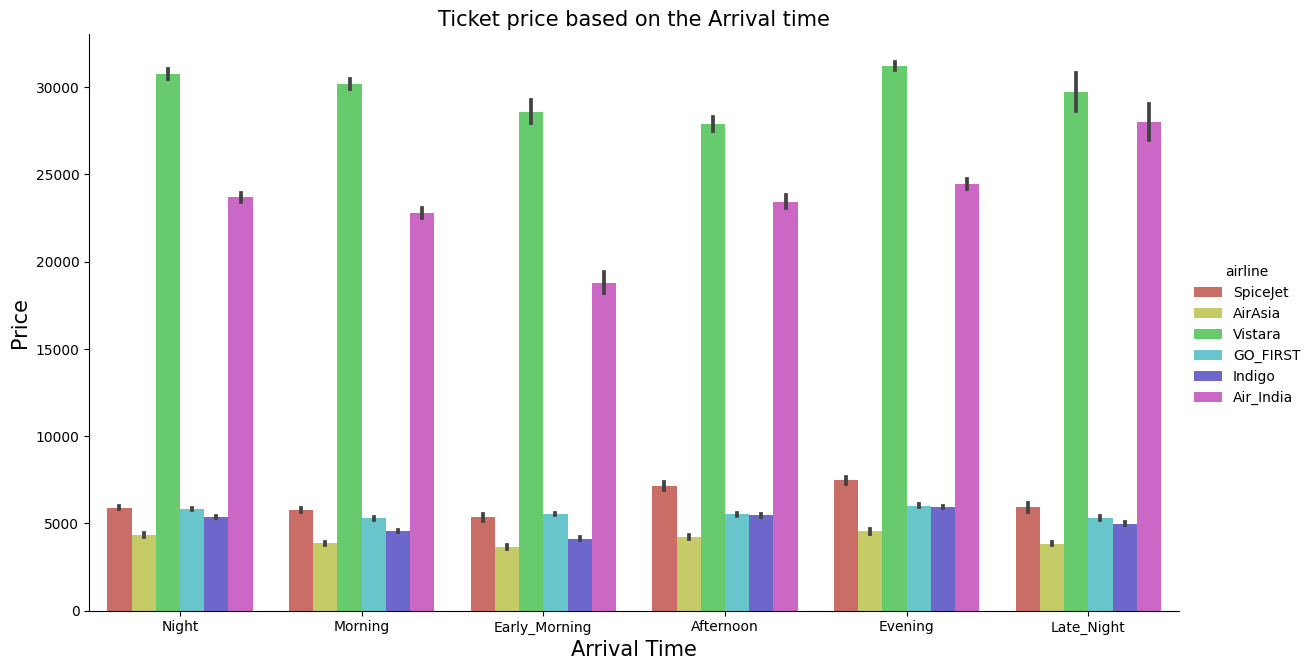

In [ ]:
plt.style.use('default')
sns.catplot(data=df, kind="bar", x="arrival_time", y="price", hue="airline", height=6.5, aspect=12/6.5,palette='hls' )
plt.title('Ticket price based on the Arrival time',fontsize=15)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

###How the price changes with change in Source and Destination?

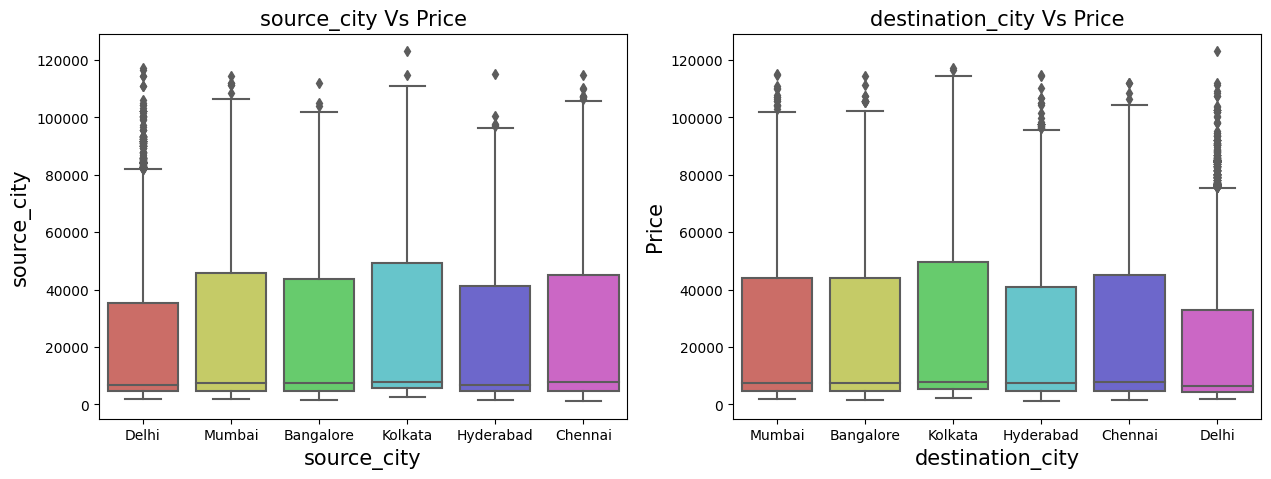

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['source_city'],y=df['price'],palette='hls')
plt.title('source_city Vs Price',fontsize=15)
plt.xlabel('source_city',fontsize=15)
plt.ylabel('source_city',fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(x=df['destination_city'],y=df['price'],palette='hls')
plt.title('destination_city Vs Price',fontsize=15)
plt.xlabel('destination_city',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

###How does the ticket price vary between Economy and Business class?

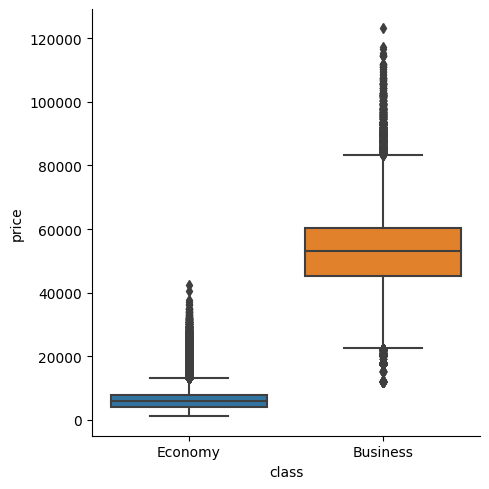

In [ ]:
sns.catplot(x = 'class', y="price", kind="box", data = df)

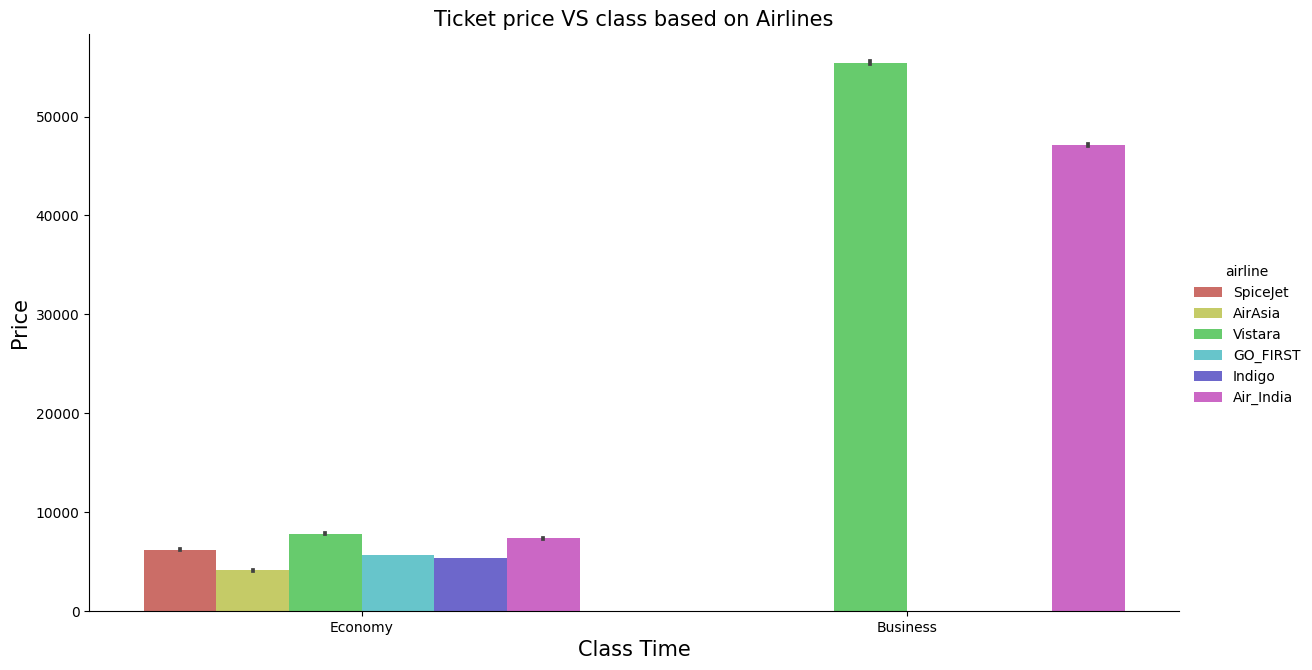

In [ ]:
plt.style.use('default')
sns.catplot(data=df, kind="bar", x="class", y="price", hue="airline", height=6.5, aspect=12/6.5,palette='hls' )
plt.title('Ticket price VS class based on Airlines',fontsize=15)
plt.xlabel('Class Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

###How does duration affected ticket price based on class?

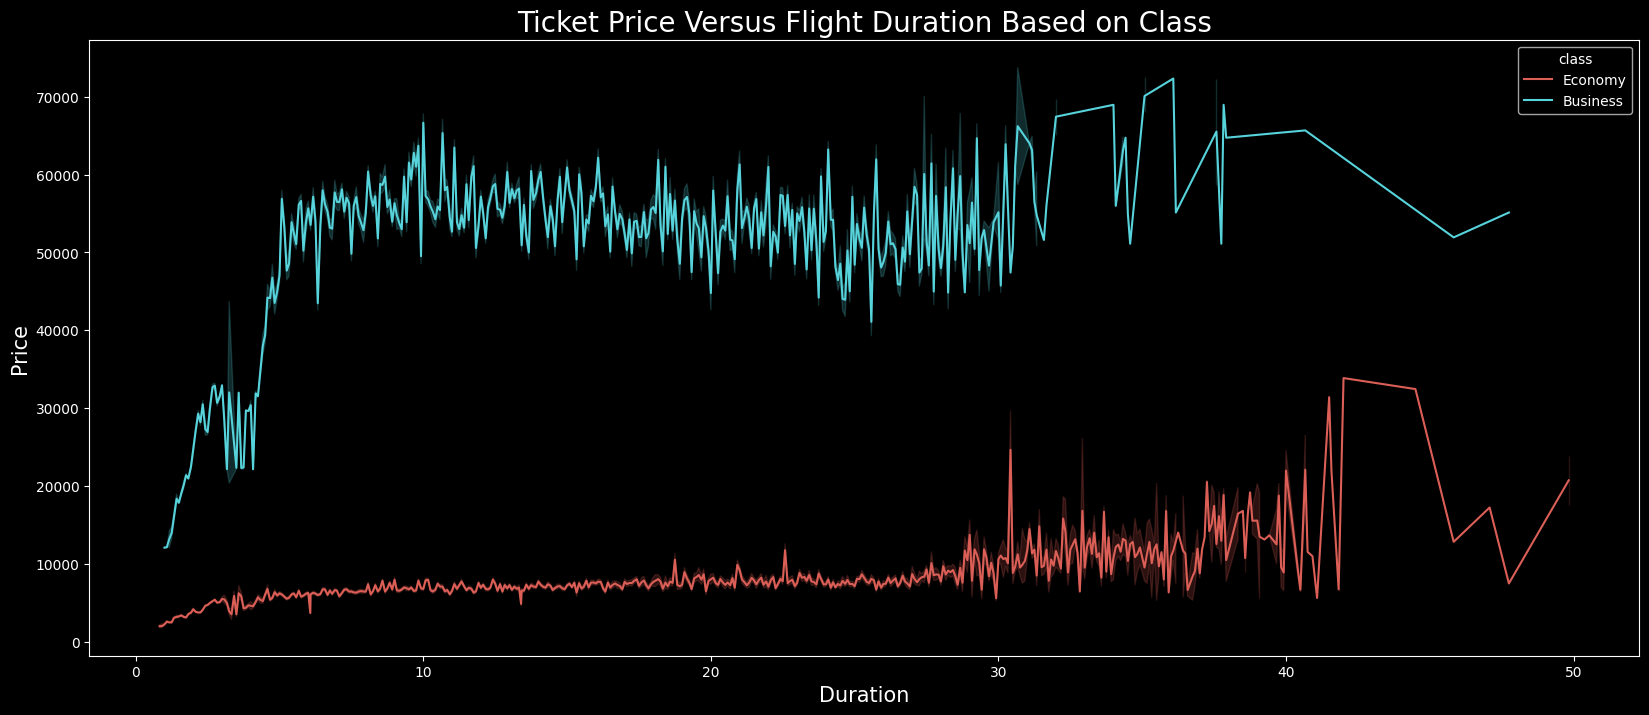

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

###How does days left affected ticket price?

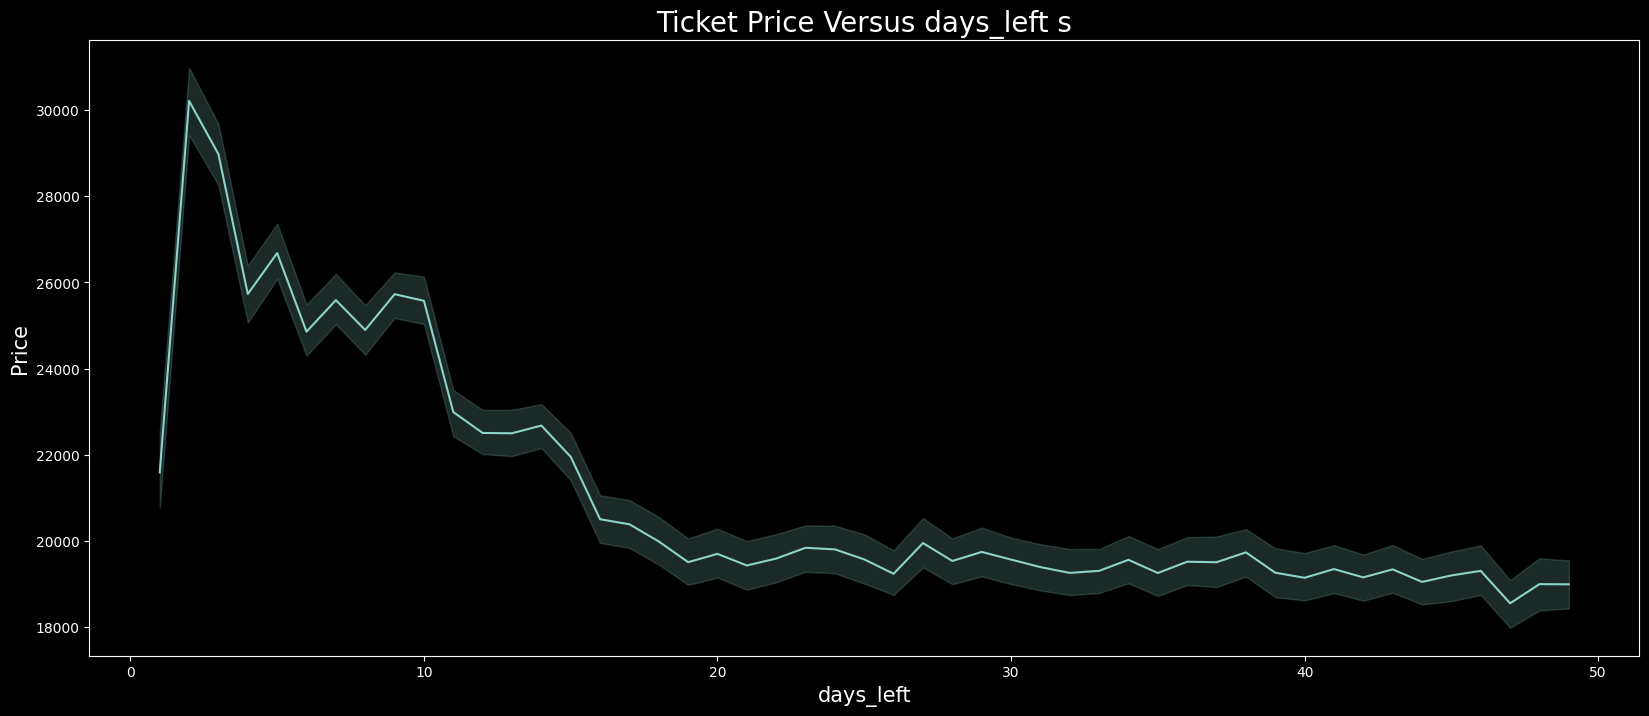

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',palette='hls')
plt.title('Ticket Price Versus days_left s',fontsize=20)
plt.xlabel('days_left',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
#chech missing data
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
#drop unused features
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
#working with categorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [ ]:
#split data into train and test
y=df['price']
X=df.drop(['price'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

#Model Optimization

In [ ]:

models={
    'KNNR':KNeighborsRegressor(),
    'DT':DecisionTreeRegressor(),
    'RF':RandomForestRegressor(),
    'XGBR':XGBRegressor()
}

for name,model in models.items():
  print(f'Using model:{name}')
  model.fit(x_train,y_train)
  train_score=model.score(x_train,y_train)
  test_score=model.score(x_test,y_test)
  print(f'Training score:{model.score(x_train,y_train)}')
  print(f'Testing score:{model.score(x_test,y_test)}')
  print("***************************************")


Using model:KNNR
Training score:0.9845482924603406
Testing score:0.9754718893351316
***************************************
Using model:DT
Training score:0.9999022653662144
Testing score:0.9834624475237534
***************************************
Using model:RF
Training score:0.9984903680763372
Testing score:0.9899733086096224
***************************************
Using model:XGBR
[13:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score:0.9573341744311994
Testing score:0.9578790916217956
***************************************


#Model Evaluation

MAE :   849.444566055554
MSE :   5116092.92870609
RMSE :   2261.8781860891822


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted  Ticket price ')

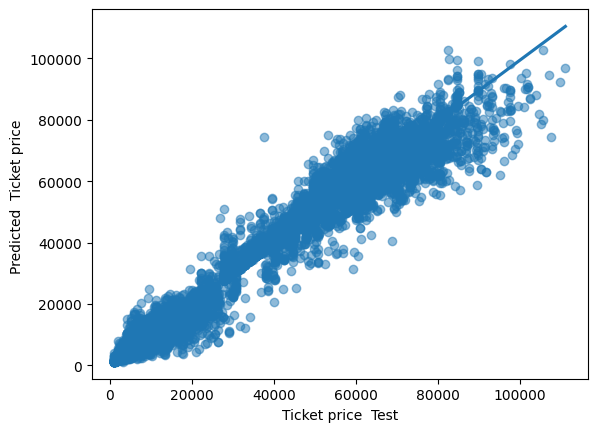

In [ ]:
from sklearn import metrics
#choose the best model

flight_model=RandomForestRegressor()
flight_model.fit(x_train,y_train)
y_pred=flight_model.predict(x_test)
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
plt.style.use('default')
sns.regplot(y_test,y_pred,scatter_kws={'alpha':0.5})
plt.xlabel('Ticket price  Test')
plt.ylabel('Predicted  Ticket price ')